In [234]:
import numpy as np
from scipy.io import loadmat
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,explained_variance_score
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import load_boston
from keras.wrappers.scikit_learn import KerasRegressor
from keras.models import Sequential
from keras.layers import Dense,Dropout
import keras
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

### Boston dataset

In [247]:
dataset = load_boston()

In [248]:
y = dataset.target
X = dataset.data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=228)

In [249]:
scaler = StandardScaler()
forest = RandomForestRegressor(n_estimators=100,n_jobs=-1)
linreg = LinearRegression(normalize=True)
boosting = LGBMRegressor()
pca = PCA(3)

## Линейная регрессия без pca

In [256]:
model = linreg
pipe = Pipeline(steps=[('model', model)])

In [257]:
pipe.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('model', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True))])

In [258]:
res = pipe.predict(X_test)
mse = mean_squared_error(res,y_test) 
varience = explained_variance_score(y_test,res)
print(mse,varience)

31.838822005345882 0.7014302558523511


## Линейная регрессия c pca до 8 компонент

In [259]:
model = linreg
pca = PCA(n_components=8)
pipe = Pipeline(steps=[('pca',pca),('model', model)])

In [260]:
pipe.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=8, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('model', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True))])

In [261]:
res = pipe.predict(X_test)
mse = mean_squared_error(res,y_test) 
varience = explained_variance_score(y_test,res)
print(mse,varience)

49.06684906426913 0.5449125582217442


## Нейронная сеть

In [262]:
def small_model():
    model = Sequential()
    model.add(Dense(128, input_dim=13, kernel_initializer='normal', activation='relu'))
    model.add(Dense(64, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='rmsprop')
    return model

In [266]:
#neural_net = MLPRegressor((300,256,128),max_iter=3000,solver='lbfgs')
neural_net = KerasRegressor(small_model,epochs=200, batch_size=100,verbose=0)
model = neural_net
pipe = Pipeline(steps=[('scaler',scaler),('model', model)])

In [267]:
pipe.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('model', <keras.wrappers.scikit_learn.KerasRegressor object at 0x7f1153aad438>)])

In [268]:
res = pipe.predict(X_test)
mse = mean_squared_error(res,y_test) 
varience = explained_variance_score(y_test,res)
print(mse,varience)

11.46602036886529 0.8953564321331738


## Графики

##### Зависимость функции ошибки от количества эпох

In [195]:
results = []
for n_epoch in [1,5,10,20,50,100,200,500]:
    model = KerasRegressor(small_model,epochs=n_epoch, batch_size=100,verbose=0)
    pipe = Pipeline(steps=[('scaler',scaler),('model', model)])
    pipe.fit(X_train,y_train)
    res = pipe.predict(X_test)
    error = mean_squared_error(res,y_test) 
    results.append(error)

In [196]:
results

[650.28465128045,
 574.6339433320644,
 331.5812186482498,
 73.04634040888402,
 18.72584323245349,
 13.076219740165222,
 11.365562128135426,
 9.417674447245053]

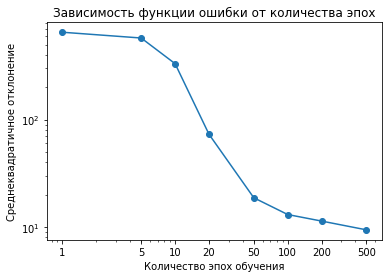

In [197]:
x_ticks = [1,5,10,20,50,100,200,500]
fig, ax = plt.subplots()
plt.scatter(x_ticks,results)
plt.plot(x_ticks,results)
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xticks(x_ticks)
ax.set_xticklabels(x_ticks)
ax.set_title('Зависимость функции ошибки от количества эпох')
ax.set_xlabel("Количество эпох обучения")
ax.set_ylabel("Среднеквадратичное отклонение")
plt.show()

##### Зависимость функции ошибки от размера скрытого слоя

In [157]:
def variable_model():
    model = Sequential()
    model.add(Dense(64, input_dim=13, kernel_initializer='normal', activation='relu'))
    for i in range(n_l-1):
        model.add(Dense(64, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='rmsprop')
    return model
results1 = []
n_layers = [1,2,3,5,10]
for n_l in n_layers:
    model = KerasRegressor(variable_model,epochs=200, batch_size=100,verbose=0)
    pipe = Pipeline(steps=[('scaler',scaler),('model', model)])
    pipe.fit(X_train,y_train)
    res = pipe.predict(X_test)
    error = mean_squared_error(res,y_test) 
    results1.append(error)    

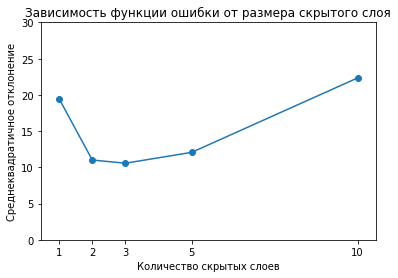

In [159]:
fig, ax = plt.subplots()
ax.set_ylim(0,30)
ax.set_xlabel("Количество скрытых слоев")
ax.set_ylabel("Среднеквадратичное отклонение")
ax.set_title('Зависимость функции ошибки от размера скрытого слоя')
ax.set_xticks(n_layers)
plt.scatter(n_layers,results1)
plt.plot(n_layers,results1)
plt.show()

In [160]:
results1

[19.450776368098854,
 11.006731611087497,
 10.566985333572585,
 12.06894282865322,
 22.330146916488296]

In [164]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

##### Зависимость функции ошибки от размера обучающей выборки

In [230]:
percents_of_data = [0.1,0.2,0.3,0.5,0.8,1.0]
results3 = []
for pod in percents_of_data:
    #sample = np.random.choice(np.arange(len(X_train)),size=int(len(X_train)*pod),replace=False)
    model = KerasRegressor(small_model,epochs=100, batch_size=100,verbose=0)
    pipe = Pipeline(steps=[('scaler',scaler),('model', model)])
    pipe.fit(X_train[:int(len(X_train)*pod)],y_train[:int(len(X_train)*pod)])
    res = pipe.predict(X_test)
    error = mean_squared_error(res,y_test) 
    results3.append(error)

In [231]:
results3

[55.347731795657374,
 49.75628808023503,
 24.320503874940183,
 20.358289731852338,
 19.298293449887584,
 12.413809054611063]

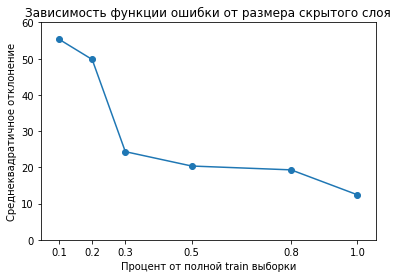

In [233]:
fig, ax = plt.subplots()
ax.set_ylim(0,60)
ax.set_xlabel("Процент от полной train выборки")
ax.set_ylabel("Среднеквадратичное отклонение")
ax.set_title('Зависимость функции ошибки от размера скрытого слоя')
ax.set_xticks(percents_of_data)
plt.scatter(percents_of_data,results3)
plt.plot(percents_of_data,results3)
plt.show()

## Их датасет

In [269]:
X_train = loadmat('ECoG_X_train.mat')['X_train']
y_train = loadmat('ECoG_Y_train.mat')['Y_train']
X_test = loadmat('ECoG_X_test.mat')['X_hold_out']
y_test = loadmat('ECoG_Y_test.mat')['Y_hold_out']
X_train = np.array([i.flatten() for i in X_train])
X_test = np.array([i.flatten() for i in X_test])

## Линейная регрессия без pca

In [270]:
model = linreg
pipe = Pipeline(steps=[('model', model)])

In [271]:
pipe.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('model', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True))])

In [272]:
res = pipe.predict(X_test)
mse = mean_squared_error(res,y_test) 
varience = explained_variance_score(y_test,res)
print(mse,varience)

1786.7787691924339 0.0703714702511365


## Линейная регрессия c pca до 80 компонент

In [300]:
model = linreg
pca = PCA(n_components=80)
pipe = Pipeline(steps=[('pca',pca),('model', model)])

In [301]:
pipe.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=80, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('model', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True))])

In [302]:
res = pipe.predict(X_test)
mse = mean_squared_error(res,y_test) 
varience = explained_variance_score(y_test,res)
print(mse,varience)

1634.8442967330448 0.1469866308767813


## Нейронная сеть

In [330]:
def big_model():
    model = Sequential()
    model.add(Dense(512, input_dim=864, kernel_initializer='normal', 
                    activation='relu',kernel_regularizer=keras.regularizers.l2(0.01)))
    model.add(Dense(256, kernel_initializer='normal', activation='relu',
                   kernel_regularizer=keras.regularizers.l2(0.01)))
    model.add(Dense(3, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='rmsprop')
    return model

In [331]:
#neural_net = MLPRegressor((300,256,128),max_iter=1000)
neural_net = KerasRegressor(big_model,epochs=100, batch_size=200,verbose=1)
model = neural_net
pipe = Pipeline(steps=[('scaler',scaler),('model', model)])

In [332]:
pipe.fit(X_train,y_train)

Epoch 1/100
12801/12801 [==============================] - 4s 331us/step - loss: 12701.1628
Epoch 2/100
12801/12801 [==============================] - 0s 33us/step - loss: 3960.8069
Epoch 3/100
12801/12801 [==============================] - 0s 31us/step - loss: 3233.0403
Epoch 4/100
12801/12801 [==============================] - 0s 34us/step - loss: 2958.6897
Epoch 5/100
12801/12801 [==============================] - 0s 37us/step - loss: 2737.6512
Epoch 6/100
12801/12801 [==============================] - 0s 36us/step - loss: 2528.5923
Epoch 7/100
12801/12801 [==============================] - 0s 35us/step - loss: 2358.0925
Epoch 8/100
12801/12801 [==============================] - 0s 37us/step - loss: 2257.7193
Epoch 9/100
12801/12801 [==============================] - 0s 34us/step - loss: 2129.4090
Epoch 10/100
12801/12801 [==============================] - 0s 34us/step - loss: 2007.4577
Epoch 11/100
12801/12801 [==============================] - 0s 34us/step - loss: 1950.7625
Epoch 

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('model', <keras.wrappers.scikit_learn.KerasRegressor object at 0x7f112da7ea58>)])

In [333]:
res = pipe.predict(X_test)
mse = mean_squared_error(res,y_test) 
varience = explained_variance_score(y_test,res)
print(mse,varience)

6087/6087 [==============================] - 2s 302us/step
2302.8095891680064 -0.2123120423053022


#### тут просто синус, красивая картинка с предсказания нейронки

In [286]:
X_simple = np.arange(0,12.56,0.01)
y_simple = np.array([np.sin(i)-np.random.rand(1)/3 for i in X_simple])
Xs_train, Xs_test, ys_train, ys_test = train_test_split(X_simple, y_simple, test_size=0.25, random_state=228)

<IPython.core.display.Javascript object>


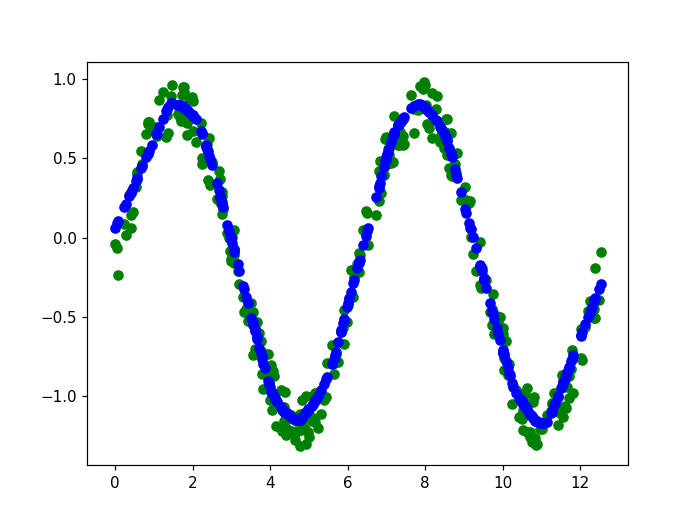

In [281]:
plt.scatter(Xs_test,ys_test,c='green')
plt.scatter(Xs_test,res,c='blue')